In [1]:
#data.head() THIS IS HOW YOU GET THE HEADINGS OF THE TABLE

    Species  Number of images
0      Bear                97
1       Cat                99
2       Dog                97
3  Elephant                97
4      Goat                85
5     Horse                67
6      Lion                95
7     Tiger                96
8      Wolf                97


<Axes: xlabel='Species', ylabel='Number of images'>

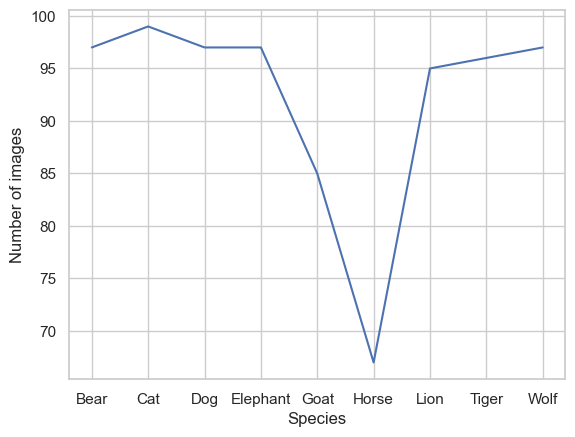

In [2]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt 
import os

# first draft

data = {'Species': ['Bear', 'Cat', 'Dog', 'Elephant', 'Goat', 'Horse', 'Lion', 'Tiger', 'Wolf'], 'Number of images': [97, 99, 97, 97, 85, 67, 95 ,96, 97]}

yippee = pd.DataFrame(data)

print(yippee)

sns.set(style='whitegrid')
sns.lineplot(y = 'Number of images', x = 'Species', data = data)


    Species  Number of images
0      Bear                52
1       Cat                69
2       Dog                68
3  Elephant                52
4      Goat                67
5     Horse                41
6      Lion                69
7     Tiger                79
8      Wolf                77


KeyError: 0

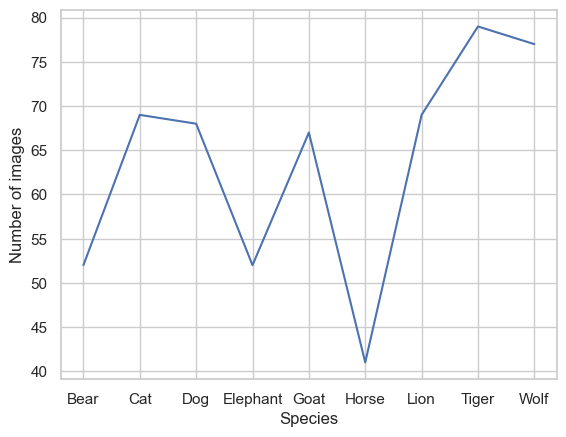

In [7]:
# new line graph with cleaned photos

data = {'Species': ['Bear', 'Cat', 'Dog', 'Elephant', 'Goat', 'Horse', 'Lion', 'Tiger', 'Wolf'], 'Number of images': [52, 69, 68, 52, 67, 41, 69, 79, 77]}

yippee = pd.DataFrame(data)

print(yippee)

sns.set(style='whitegrid')
sns.lineplot(y = 'Number of images', x = 'Species', data = data)

<Axes: xlabel='Number of images'>

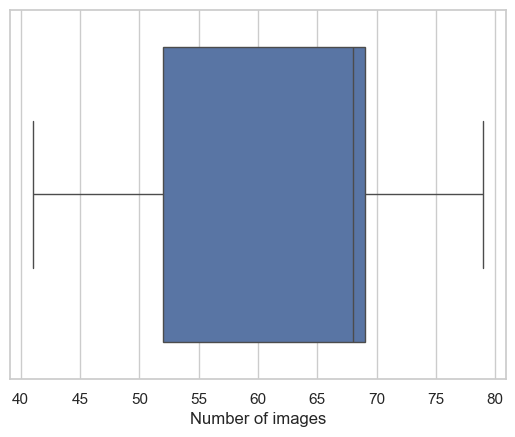

In [4]:
sns.boxplot(x = 'Number of images', data = data)

In [5]:
# create features and targets in data frame

from skimage.io import imread
from skimage.transform import resize
import numpy as np
import pandas as pd
import cv2

Categories = ['Bear', 'Cat', 'Dog', 'Elephant', 'Goat', 'Horse', 'Lion', 'Tiger', 'Wolf']

flat_data_arr = []

target_arr = []

for i in Categories:
    print(f'loading... category : {i}')
    
    path=os.path.join('C:/Users/User/Documents/Project work/mammals/', i) # joins the first part of the directory with the species' name
    for img in os.listdir(path): # for all entries in  the directory WHICH ARE THE IMAGES

        img_array = imread(os.path.join(path, img)) # create an array for the images, the array stores the path of each image

        img_resized = resize(img_array, (150, 150, 3)) # resizes all the images so they are uniform

        flat_data_arr.append(img_resized.flatten()) # also resizes the image into a 1d array

        target_arr.append(Categories.index(i)) # appends the name of the species

    print(f'loaded category: {i} successfully')

flat_data = np.array(flat_data_arr)
#print(flat_data.shape)

target = np.array(target_arr) # species

df=pd.DataFrame(flat_data)
df['Target'] = target # label?
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

#sns.lineplot(y = y, x = x, data = flat_data)
#print(x, y)

loading... category : Bear
loaded category: Bear successfully
loading... category : Cat
loaded category: Cat successfully
loading... category : Dog
loaded category: Dog successfully
loading... category : Elephant
loaded category: Elephant successfully
loading... category : Goat
loaded category: Goat successfully
loading... category : Horse
loaded category: Horse successfully
loading... category : Lion
loaded category: Lion successfully
loading... category : Tiger
loaded category: Tiger successfully
loading... category : Wolf
loaded category: Wolf successfully
(574, 67500)
        0         1         2         3         4         5         6      \
0    0.351394  0.423899  0.445527  0.412121  0.465066  0.474785  0.496060   
1    0.317703  0.348770  0.142245  0.430274  0.408581  0.200521  0.415670   
2    0.762184  0.596821  0.435358  0.862595  0.750844  0.604732  0.929991   
3    0.522837  0.546367  0.530780  0.526077  0.549607  0.534130  0.524698   
4    0.226152  0.214959  0.218451  0

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# x is the pixel values

#stratify (biases), target = y (label), validation data set (search it up)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state=42, test_size=0.2, shuffle=True) 
print('x_train : ') 
print(x_train.head()) 
print(x_train.shape) 
print('') 
print('x_test : ') 
print(x_test.head()) 
print(x_test.shape) 
print('') 
print('y_train : ') 
print(y_train.head()) 
print(y_train.shape) 
print('') 
print('y_test : ') 
print(y_test.head()) 
print(y_test.shape)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify = y_train, random_state=42, train_size=0.875 , shuffle=True) # train size = 0.8 x 0.875
print('x_val : ') 
print(x_val.head()) 
print(x_val.shape) 
print('') 
print('y_val : ') 
print(y_val.head()) 
print(y_val.shape) 
print('') 


x_train : 
        0         1         2         3         4         5         6      \
185  0.495022  0.563735  0.588241  0.429684  0.472286  0.430181  0.495603   
224  0.122604  0.131681  0.040747  0.109180  0.113031  0.050263  0.109257   
221  0.064910  0.125163  0.096839  0.060222  0.119524  0.097071  0.065052   
31   0.076931  0.101664  0.051198  0.072200  0.093868  0.056804  0.080117   
25   0.745494  0.709339  0.674113  0.753952  0.722700  0.689705  0.721174   

        7         8         9      ...     67490     67491     67492  \
185  0.542755  0.533981  0.624805  ...  0.251238  0.589041  0.589051   
224  0.102468  0.058677  0.130758  ...  0.574754  0.984080  0.795583   
221  0.118876  0.100543  0.073667  ...  0.536786  0.557664  0.528423   
31   0.102504  0.057921  0.106613  ...  0.801922  0.601461  0.632388   
25   0.688910  0.659137  0.617190  ...  0.490024  0.621847  0.565066   

        67493     67494     67495     67496     67497     67498     67499  
185  0.339815  0.

In [7]:
from sklearn.svm import SVC 
svc = SVC(kernel = 'linear', gamma = 'auto') # apply a linear model to the data
svc.fit(x_train, y_train)

SVC(gamma='auto', kernel='linear')

In [8]:
# opens picture

picture = x_val.iloc[57] # takes the first row (or column)
actual_image  = np.array(picture).reshape((150,150, 3)) # reshapes the 1d array into 150x150 by 3 (RBG)
#cv2.imshow('demo window',actual_image) # name of the window, image

# tear down cv2 gracefully
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [9]:
# prediction
# outputs either 1 or 0
val_prediction = svc.predict(x_val)

labels = {0: 'Bear', 1: 'Cat', 2: 'Dog', 3: 'Elephant', 4: 'Goat', 5: 'Horse', 6: 'Lion', 7: 'Tiger', 8: 'Wolf'}

count = 0
total = 0
for i,x in enumerate(val_prediction): # i is a placeholder
    print('Number: ', i)
    print(f'Prediction: {labels[val_prediction[i]]}, Actual animal: {labels[y_val.iloc[i]]}')
    total += 1
    if (labels[val_prediction[i]] == (labels[y_val.iloc[i]])):
        count += 1

val_accuracy = (count/total) * 100
print('Accuracy for the validation set is: ', val_accuracy, '%')



Number:  0
Prediction: Lion, Actual animal: Dog
Number:  1
Prediction: Lion, Actual animal: Dog
Number:  2
Prediction: Bear, Actual animal: Cat
Number:  3
Prediction: Dog, Actual animal: Lion
Number:  4
Prediction: Wolf, Actual animal: Dog
Number:  5
Prediction: Elephant, Actual animal: Elephant
Number:  6
Prediction: Bear, Actual animal: Bear
Number:  7
Prediction: Cat, Actual animal: Horse
Number:  8
Prediction: Cat, Actual animal: Cat
Number:  9
Prediction: Bear, Actual animal: Tiger
Number:  10
Prediction: Elephant, Actual animal: Goat
Number:  11
Prediction: Dog, Actual animal: Goat
Number:  12
Prediction: Wolf, Actual animal: Goat
Number:  13
Prediction: Bear, Actual animal: Dog
Number:  14
Prediction: Elephant, Actual animal: Horse
Number:  15
Prediction: Cat, Actual animal: Tiger
Number:  16
Prediction: Cat, Actual animal: Dog
Number:  17
Prediction: Tiger, Actual animal: Lion
Number:  18
Prediction: Dog, Actual animal: Horse
Number:  19
Prediction: Elephant, Actual animal: Ele

Confusion Matrix for validation set:

Predicted:  Bear  Cat  Dog  Elephant  Goat  Horse  Lion  Tiger  Wolf  All
Actual:                                                                  
Bear           4    2    0         0     0      0     0      0     0    6
Cat            2    2    2         0     0      1     1      0     1    9
Dog            1    1    0         0     0      1     3      0     3    9
Elephant       1    0    0         2     0      1     0      0     2    6
Goat           0    2    1         1     2      0     0      0     2    8
Horse          0    1    1         2     0      0     0      1     0    5
Lion           1    0    1         0     1      0     2      3     1    9
Tiger          2    3    1         2     0      0     0      0     2   10
Wolf           1    2    2         1     0      0     0      1     3   10
All           12   13    8         8     3      3     6      5    14   72


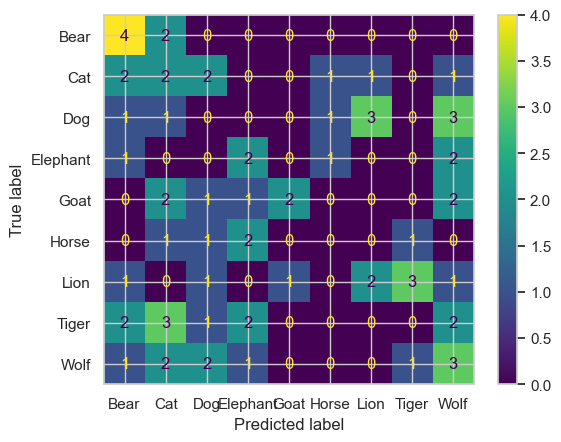

In [44]:
# confusion matrix 
from sklearn import metrics
actual_animal = []
animal_prediction = []

for i,x in enumerate(val_prediction): # i is a placeholder
    actual_animal.append(labels[y_val.iloc[i]])
    animal_prediction.append(labels[val_prediction[i]])

print('Confusion Matrix for validation set:\n')

actual_animal = pd.Series((actual_animal), name = 'Actual')
animal_prediction = pd.Series((animal_prediction), name = 'Predicted')
df_confusion = pd.crosstab(actual_animal, animal_prediction, rownames = ['Actual:'], colnames = ['Predicted:'], margins = True)
print(df_confusion)

confusion_matrix = metrics.confusion_matrix(actual_animal, animal_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bear', 'Cat', 'Dog', 'Elephant', 'Goat', 'Horse', 'Lion', 'Tiger', 'Wolf'])
cm_display.plot()
plt.show()

In [28]:
# opens picture

picture = x_test.iloc[98] # takes the first row (or column)
actual_image  = np.array(picture).reshape((150,150, 3)) # reshapes the 1d array into 150x150 by 3 (RBG)
#cv2.imshow('demo window',actual_image) # name of the window, image

# tear down cv2 gracefully
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [11]:
test_prediction = svc.predict(x_test)

labels = {0: 'Bear', 1: 'Cat', 2: 'Dog', 3: 'Elephant', 4: 'Goat', 5: 'Horse', 6: 'Lion', 7: 'Tiger', 8: 'Wolf'}

count = 0
total = 0
for i,x in enumerate(test_prediction): # i is a placeholder
    print('Number: ', i)
    print(f'prediction: {labels[test_prediction[i]]}, actual animal: {labels[y_test.iloc[i]]}')
    total += 1
    if (labels[test_prediction[i]] == (labels[y_test.iloc[i]])):
        count += 1

test_accuracy = (count/total) * 100
print('Accuracy for the test set is: ', test_accuracy, '%')

Number:  0
prediction: Cat, actual animal: Cat
Number:  1
prediction: Cat, actual animal: Tiger
Number:  2
prediction: Bear, actual animal: Bear
Number:  3
prediction: Wolf, actual animal: Wolf
Number:  4
prediction: Bear, actual animal: Bear
Number:  5
prediction: Bear, actual animal: Elephant
Number:  6
prediction: Dog, actual animal: Wolf
Number:  7
prediction: Dog, actual animal: Cat
Number:  8
prediction: Bear, actual animal: Cat
Number:  9
prediction: Wolf, actual animal: Dog
Number:  10
prediction: Elephant, actual animal: Tiger
Number:  11
prediction: Dog, actual animal: Dog
Number:  12
prediction: Wolf, actual animal: Wolf
Number:  13
prediction: Horse, actual animal: Dog
Number:  14
prediction: Bear, actual animal: Cat
Number:  15
prediction: Elephant, actual animal: Elephant
Number:  16
prediction: Lion, actual animal: Lion
Number:  17
prediction: Elephant, actual animal: Elephant
Number:  18
prediction: Elephant, actual animal: Goat
Number:  19
prediction: Wolf, actual anim

Confusion Matrix for test set:

Predicted:  Bear  Cat  Dog  Elephant  Goat  Horse  Lion  Tiger  Wolf  All
Actual:                                                                  
Bear           8    2    0         0     0      0     0      0     0   10
Cat            2    7    2         0     0      1     1      0     1   14
Dog            1    1    4         0     0      1     3      0     4   14
Elephant       1    0    0         6     0      1     0      0     2   10
Goat           0    2    1         1     7      0     0      0     2   13
Horse          0    1    1         2     0      3     0      1     0    8
Lion           1    0    1         0     1      0     7      3     1   14
Tiger          2    3    1         2     0      0     0      6     2   16
Wolf           1    2    2         1     0      0     0      1     9   16
All           16   18   12        12     8      6    11     11    21  115


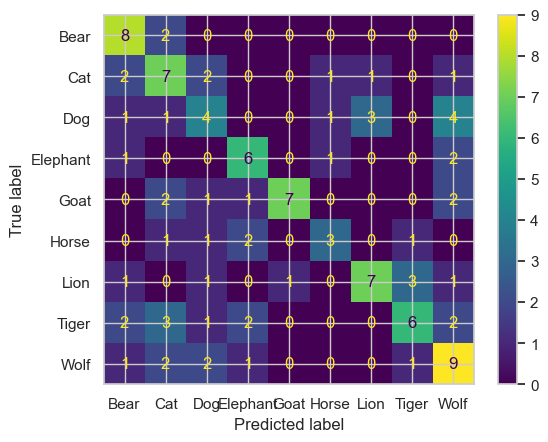

In [45]:
# confusion matrix 
actual_animal = []
animal_prediction = []

for i,x in enumerate(test_prediction): # i is a placeholder
    actual_animal.append(labels[y_test.iloc[i]])
    animal_prediction.append(labels[test_prediction[i]])

print('Confusion Matrix for test set:\n')

actual_animal = pd.Series((actual_animal), name = 'Actual')
animal_prediction = pd.Series((animal_prediction), name = 'Predicted')
df_confusion = pd.crosstab(actual_animal, animal_prediction, rownames = ['Actual:'], colnames = ['Predicted:'], margins = True)
print(df_confusion)

confusion_matrix = metrics.confusion_matrix(actual_animal, animal_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bear', 'Cat', 'Dog', 'Elephant', 'Goat', 'Horse', 'Lion', 'Tiger', 'Wolf'])
cm_display.plot()
plt.show()

In [12]:
# opens picture

picture = x_train.iloc[95] # takes the first row (or column)
actual_image  = np.array(picture).reshape((150,150, 3)) # reshapes the 1d array into 150x150 by 3 (RBG)
#cv2.imshow('demo window',actual_image) # name of the window, image

# tear down cv2 gracefully
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [14]:
train_prediction = svc.predict(x_train)

labels = {0: 'Bear', 1: 'Cat', 2: 'Dog', 3: 'Elephant', 4: 'Goat', 5: 'Horse', 6: 'Lion', 7: 'Tiger', 8: 'Wolf'}

count = 0
total = 0
for i,x in enumerate(train_prediction): # i is a placeholder
    print('Number: ', i)
    print(f'prediction: {labels[train_prediction[i]]}, actual animal: {labels[y_train.iloc[i]]}')
    total += 1
    if (labels[train_prediction[i]] == (labels[y_train.iloc[i]])):
        count += 1

train_accuracy = (count/total) * 100
print('Accuracy for the train set is:', train_accuracy, '%')

Number:  0
prediction: Bear, actual animal: Bear
Number:  1
prediction: Cat, actual animal: Cat
Number:  2
prediction: Elephant, actual animal: Elephant
Number:  3
prediction: Cat, actual animal: Cat
Number:  4
prediction: Tiger, actual animal: Tiger
Number:  5
prediction: Dog, actual animal: Dog
Number:  6
prediction: Lion, actual animal: Lion
Number:  7
prediction: Tiger, actual animal: Tiger
Number:  8
prediction: Bear, actual animal: Bear
Number:  9
prediction: Lion, actual animal: Lion
Number:  10
prediction: Horse, actual animal: Horse
Number:  11
prediction: Wolf, actual animal: Wolf
Number:  12
prediction: Cat, actual animal: Cat
Number:  13
prediction: Wolf, actual animal: Wolf
Number:  14
prediction: Dog, actual animal: Dog
Number:  15
prediction: Dog, actual animal: Dog
Number:  16
prediction: Tiger, actual animal: Tiger
Number:  17
prediction: Horse, actual animal: Horse
Number:  18
prediction: Horse, actual animal: Horse
Number:  19
prediction: Goat, actual animal: Goat
Nu

Confusion Matrix for train set:

Predicted:  Bear  Cat  Dog  Elephant  Goat  Horse  Lion  Tiger  Wolf  All
Actual:                                                                  
Bear          46    0    0         0     0      0     0      0     0   46
Cat            0   60    0         0     0      0     0      0     0   60
Dog            0    0   58         0     0      0     0      0     1   59
Elephant       0    0    0        46     0      0     0      0     0   46
Goat           0    0    0         0    59      0     0      0     0   59
Horse          0    0    0         0     0     36     0      0     0   36
Lion           0    0    0         0     0      0    60      0     0   60
Tiger          0    0    0         0     0      0     0     69     0   69
Wolf           0    0    0         0     0      0     0      0    67   67
All           46   60   58        46    59     36    60     69    68  502


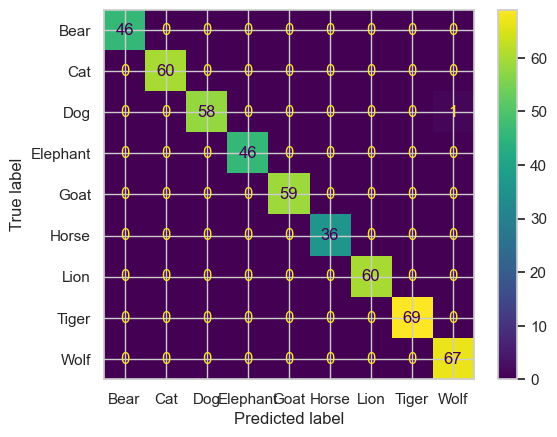

In [43]:
# confusion matrix 
actual_animal = []
animal_prediction = []

for i,x in enumerate(train_prediction): # i is a placeholder
    actual_animal.append(labels[y_train.iloc[i]])
    animal_prediction.append(labels[train_prediction[i]])

print('Confusion Matrix for train set:\n')

actual_animal = pd.Series((actual_animal), name = 'Actual')
animal_prediction = pd.Series((animal_prediction), name = 'Predicted')
df_confusion = pd.crosstab(actual_animal, animal_prediction, rownames = ['Actual:'], colnames = ['Predicted:'], margins = True)
print(df_confusion)

confusion_matrix = metrics.confusion_matrix(actual_animal, animal_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Bear', 'Cat', 'Dog', 'Elephant', 'Goat', 'Horse', 'Lion', 'Tiger', 'Wolf'])
cm_display.plot()
plt.show()

In [29]:
total_accuracy = (val_accuracy + test_accuracy + train_accuracy) / 3

print('Accuracy for the validation set is:', round(val_accuracy, 2), '% (Using 10% of the data set)')
print('Accuracy for the test set is:', round(test_accuracy, 2), '% (Using 20% of the data set)')
print('Accuracy for the train set is:', round(train_accuracy, 2), '% (Using 70% of the data set)')
print('Overall, the accuracy for the data set is:', round(total_accuracy, 2), '%')


Accuracy for the validation set is: 20.83 % (Using 10% of the data set)
Accuracy for the test set is: 49.57 % (Using 20% of the data set)
Accuracy for the train set is: 99.8 % (Using 70% of the data set)
Overall, the accuracy for the data set is: 56.73 %


In [46]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(actual_animal, animal_prediction)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.5        0.38888889 0.33333333 0.5        0.875      0.5
 0.63636364 0.54545455 0.42857143]
recall: [0.8        0.5        0.28571429 0.6        0.53846154 0.375
 0.5        0.375      0.5625    ]
fscore: [0.61538462 0.4375     0.30769231 0.54545455 0.66666667 0.42857143
 0.56       0.44444444 0.48648649]
support: [10 14 14 10 13  8 14 16 16]
